In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-27,149.119995,149.210007,145.550003,146.770004,145.936234,104818600
1,2021-07-28,144.809998,146.970001,142.539993,144.979996,144.156387,118931200
2,2021-07-29,144.690002,146.550003,144.580002,145.639999,144.812653,56699500
3,2021-07-30,144.380005,146.330002,144.110001,145.860001,145.031387,70440600
4,2021-08-02,146.360001,146.949997,145.250000,145.520004,144.693344,62880000
...,...,...,...,...,...,...,...
247,2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400
248,2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600
249,2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400
250,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.949997,53623900


In [9]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-27,149.119995,149.210007,145.550003,146.770004,145.936234,104818600
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.156387,118931200
2021-07-29,144.690002,146.550003,144.580002,145.639999,144.812653,56699500
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.031387,70440600
2021-08-02,146.360001,146.949997,145.250000,145.520004,144.693344,62880000
...,...,...,...,...,...,...
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600
2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400


In [10]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-07-27,2.349991,3.660004
2021-07-28,-0.169998,4.430008
2021-07-29,-0.949997,1.970001
2021-07-30,-1.479996,2.220001
2021-08-02,0.839997,1.699997


In [11]:
# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
Y

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [12]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Return,Cum_Strategy
Date,,,,,,,,,,,,,
2021-07-27,149.119995,149.210007,145.550003,146.770004,145.936234,104818600,2.349991,3.660004,0,NaN,NaN,NaN,NaN
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.156387,118931200,-0.169998,4.430008,1,-0.012196,-0.000000,-0.012196,0.000000
2021-07-29,144.690002,146.550003,144.580002,145.639999,144.812653,56699500,-0.949997,1.970001,1,0.004552,0.004552,-0.007644,0.004552
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.031387,70440600,-1.479996,2.220001,1,0.001511,0.001511,-0.006133,0.006063
2021-08-02,146.360001,146.949997,145.250000,145.520004,144.693344,62880000,0.839997,1.699997,1,-0.002331,-0.002331,-0.008464,0.003732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400,-1.919998,3.350006,1,0.013510,0.013510,0.086078,0.414774
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600,-0.850006,3.630005,1,0.015094,0.015094,0.101172,0.429868
2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400,1.300003,2.869995,0,-0.008111,-0.008111,0.093062,0.421757


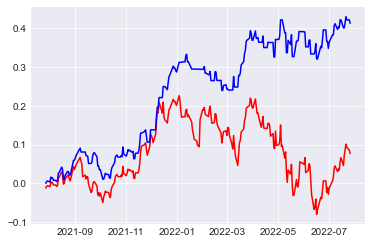

In [13]:
plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

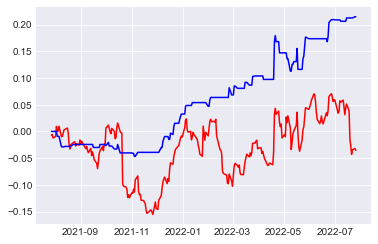

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('IBM.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

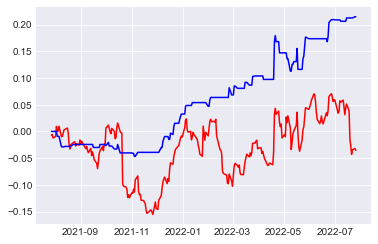

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('IBM.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

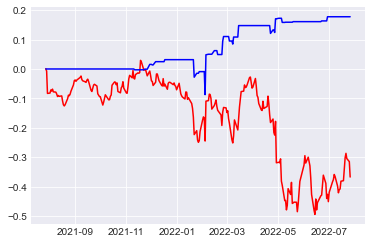

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AMZN.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

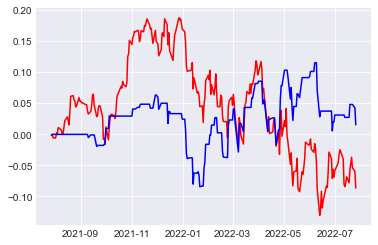

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('MSFT.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

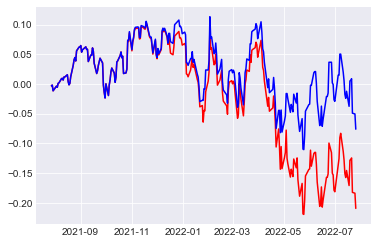

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('GOOG.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

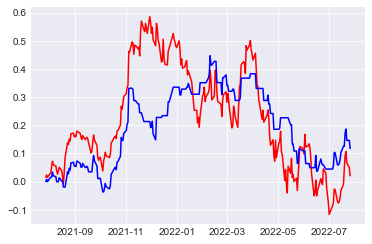

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('NVDA.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

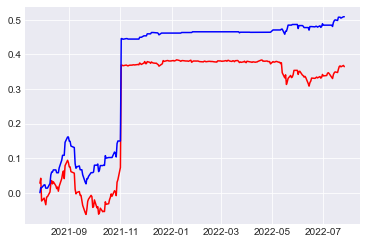

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('ROG.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

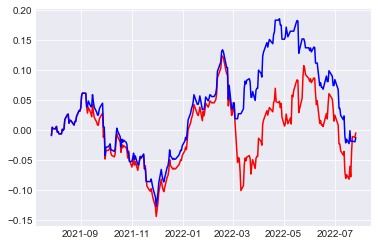

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('PM.csv')

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# Drop The original date column
df = df.drop(['Date'], axis='columns')

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables: buy for +1, no position for 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# print(Y)

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
Y_train = Y[:split]

# Test data set
X_test = X[split:]
Y_test = Y[split:]

# Support vector classifier
cls = SVC().fit(X_train, Y_train)

# TODO Accuracy test
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Return'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()


plt.plot(df['Cum_Return'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')